# Task 5
# Loan Prediction

In [505]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score
%matplotlib inline

In [447]:
#Load the dataset
df=pd.read_csv('loan_pred.csv')

In [448]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [449]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,0.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [450]:
# Replacing the categorical data with Numerical data
df.replace({'Gender': {'Male': 1, 'Female': 0}}, inplace=True)
df.replace({'Married': {'Yes': 1, 'No': 0}}, inplace=True)
df.replace({'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace=True)
df.replace({'Self_Employed': {'Yes': 1, 'No': 0}}, inplace=True)
df.replace({'Property_Area': {'Rural':0,'Semiurban':1,'Urban':2}}, inplace=True)
df.replace({'Loan_Status': {'Y':1,'N':0}}, inplace=True)
# df['Married']=df['Married'].map({'Yes':1,'No':0})
# df['Education']=df['Education'].map({'Graduate':1,'Not Graduate	':0})
# df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
# df['Property_Area']=df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
# df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [451]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,0.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [452]:
# Finding the Null Values
null_values = df.isnull().sum()
print(null_values)

Loan_ID               0
Gender                0
Married               0
Dependents           14
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     13
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [453]:
# Replacing Null Values with Median value
df.fillna(df.median(), inplace=True)

<ipython-input-453-7034311f6999>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [454]:
# Checking the status of Null Values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [455]:
# Droping unnecessary features
x=df.drop(['Loan_ID','Dependents','Loan_Status'],axis=1)
y=df.iloc[:,-1]

In [457]:
x.info

<bound method DataFrame.info of      Gender  Married  Education  Self_Employed  ApplicantIncome  \
0         1        0          1              0             5849   
1         1        1          1              0             4583   
2         1        1          1              1             3000   
3         1        1          0              0             2583   
4         1        0          1              0             6000   
..      ...      ...        ...            ...              ...   
609       0        0          1              0             2900   
610       1        1          1              0             4106   
611       1        1          1              0             8072   
612       1        1          1              0             7583   
613       0        0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0       128.0             360.0             1.0   
1               150

In [458]:
y.info

<bound method Series.info of 0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64>

<Axes: >

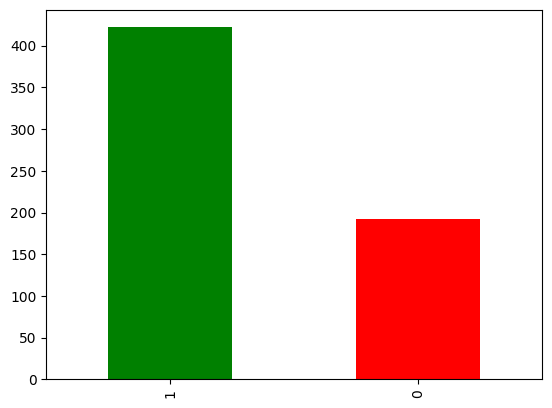

In [459]:
y.value_counts().plot(kind='bar',color=['green','red'])

In [462]:
#sns.pairplot(df,hue='Loan_Status')

In [463]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [464]:
x_train.shape

(491, 10)

In [465]:
y_train.shape

(491,)

In [466]:
x_test.shape

(123, 10)

In [467]:
y_test.shape

(123,)

# Traning the Model

To choose the Best Model which will gives the best Accuracy rate

In [471]:
# Traning the Model with LogisticRegression
from sklearn.linear_model import LogisticRegression
cls1=LogisticRegression()
cls1.fit(x_train,y_train)

LogisticRegression()

In [472]:
# Traning the Model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
cls2=KNeighborsClassifier()
cls2.fit(x_train,y_train)

KNeighborsClassifier()

In [473]:
# Traning the Model with DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
cls3=DecisionTreeClassifier()
cls3.fit(x_train,y_train)

DecisionTreeClassifier()

In [474]:
# Traning the Model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
cls4=RandomForestClassifier()
cls4.fit(x_train,y_train)

RandomForestClassifier()

In [475]:
from sklearn.metrics import accuracy_score
y_pred1=cls1.predict(x_test)
y_pred2=cls2.predict(x_test)
y_pred3=cls3.predict(x_test)
y_pred4=cls4.predict(x_test)


In [476]:
print(accuracy_score(y_pred1,y_test))
print(accuracy_score(y_pred2,y_test))
print(accuracy_score(y_pred3,y_test))
print(accuracy_score(y_pred4,y_test))

0.7723577235772358
0.6422764227642277
0.6747967479674797
0.7642276422764228


In [477]:
conf_matrix = confusion_matrix(y_test, y_pred1)

In [478]:
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[13 24]
 [ 4 82]]


In [507]:
roc_auc_score(y_test, cls1.predict_proba(x_test)[:, 1])

0.700502828409805

# New Data Sample

Checking the Model with New data sample


In [490]:
#  New data sample
x_new=np.array([[0,1,1,1,45,1,0,1,0,1]])

In [491]:
print(x_new.shape)

(1, 10)


In [492]:
print(cls1.n_features_in_)

10


In [503]:
prediction = cls1.predict(x_new)
if prediction[0] == 1:
    prediction = "Approved"
else:
    prediction = "Rejected"

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [504]:
print("Loan Status for New Data Sample=",prediction)

Loan Status for New Data Sample= Approved
